In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')


In [ ]:
#DISTRIBUTIONS
#distplot, jointplot, pairplot, rugplot, kde

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


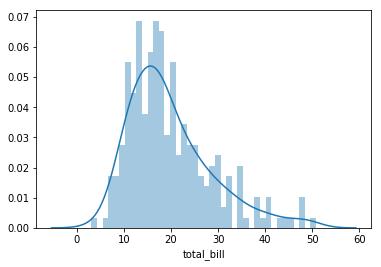

In [16]:
#univariate set of observatiosn
sns.distplot(tips['total_bill'], bins=40)

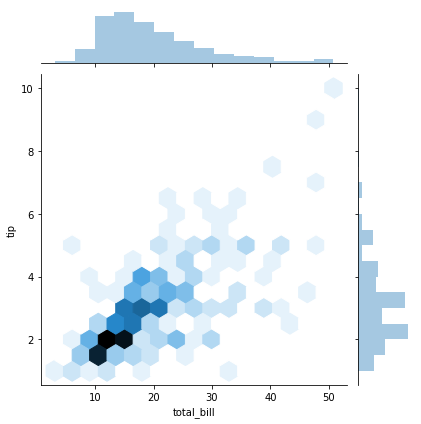

In [18]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')

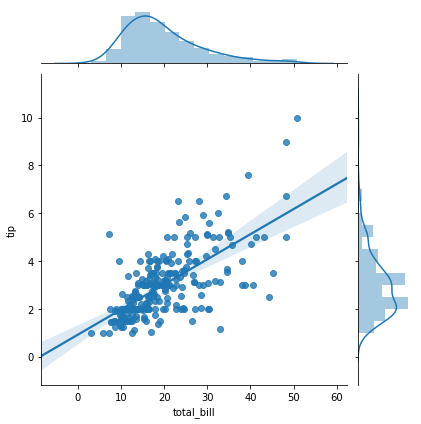

In [19]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')

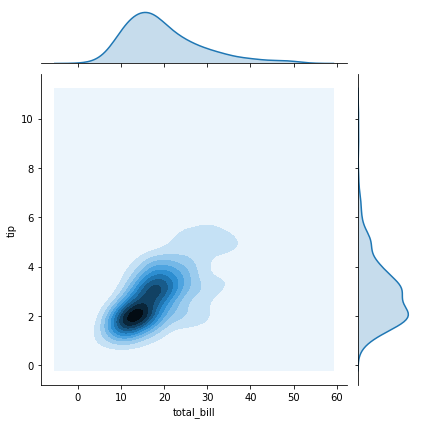

In [20]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')

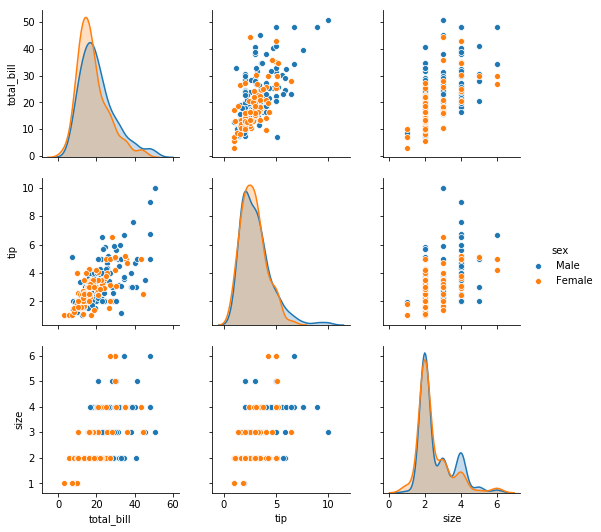

In [22]:
sns.pairplot(tips,hue='sex') #basically does a joint plot for every possible combination of categories in your data frame
#hue allows you to seperate categorical variables like male/female
#pallette is another option here

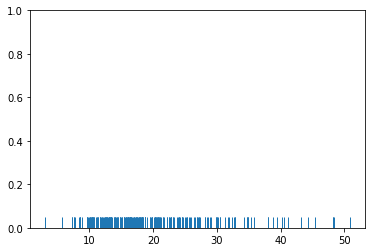

In [23]:
sns.rugplot(tips['total_bill']) #sort of like a histogram with no bins. So it plots every single data point

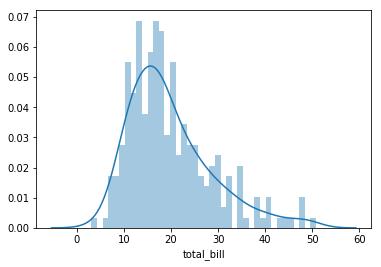

In [26]:
 #how do you build the kde plot in the histogram? 
sns.distplot(tips['total_bill'], bins=40)

In [27]:
#kde stands for kernal density estimation 
 #  https://en.wikipedia.org/wiki/Kernel_density_estimation#/media/File:Comparison_of_1D_histogram_and_KDE.png

(0, 1)

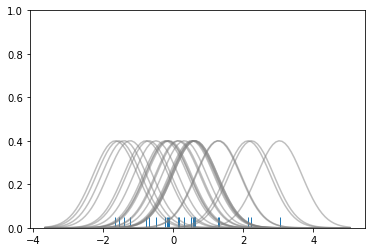

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

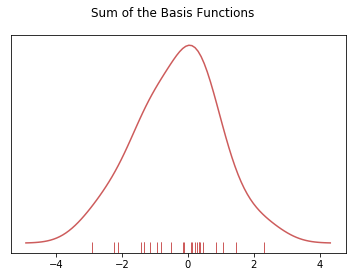

In [29]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

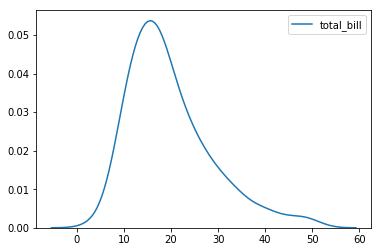

In [30]:
sns.kdeplot(tips['total_bill']) #you can plot just the kde without the histogram with kdeplot

In [31]:

#CATEGORICAL PLOTS


In [32]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
import numpy as np

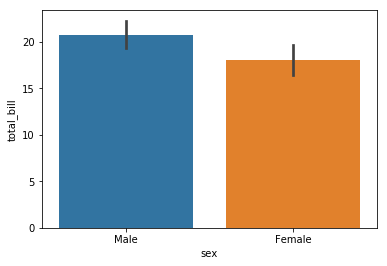

In [36]:
sns.barplot(x='sex',y='total_bill',data=tips)

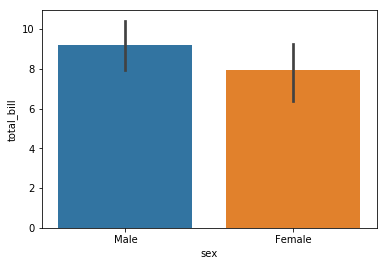

In [37]:
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std)

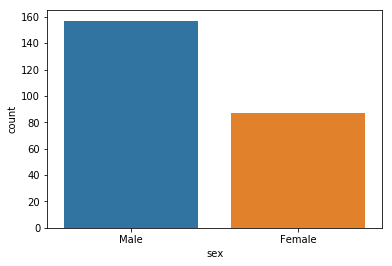

In [38]:
sns.countplot(x='sex', data=tips)

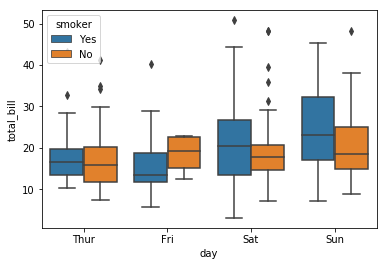

In [40]:
sns.boxplot(x='day',y='total_bill', data=tips, hue='smoker')

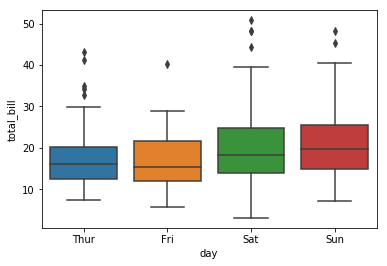

In [41]:
sns.boxplot(x='day',y='total_bill', data=tips)

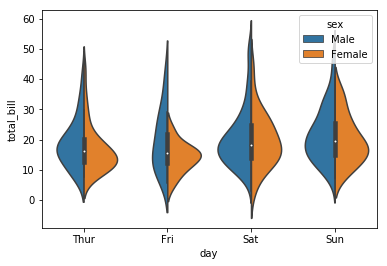

In [44]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex',split=True) 
#basically shows the kde of the underlying distribution
#can split the data using hue

C:\Users\Jake\Anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


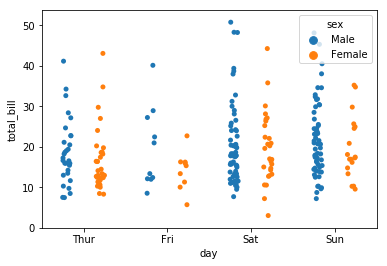

In [48]:
sns.stripplot(x='day',y='total_bill', data=tips,jitter=True, hue='sex', split=True)

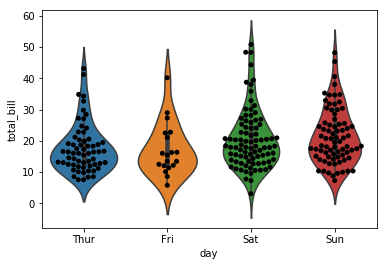

In [52]:
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')
#dont use swarm plots for large datasets

C:\Users\Jake\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


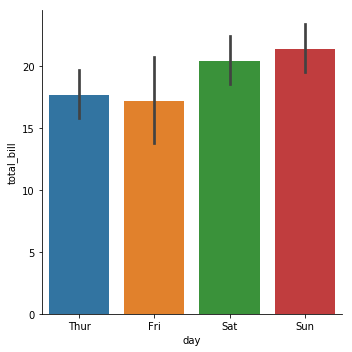

In [54]:
#factor plot
sns.factorplot(x='day', y='total_bill', data=tips, kind='bar')
#sort of a shortcut to make various types of plots

C:\Users\Jake\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


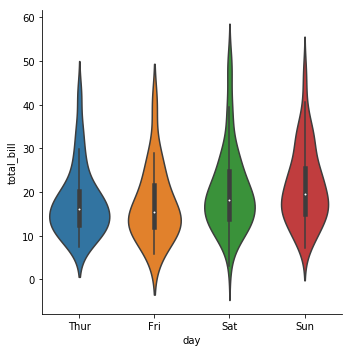

In [55]:
sns.factorplot(x='day', y='total_bill', data=tips, kind='violin')

In [56]:


#MATRIX PLOTS



In [57]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [59]:
#you need variables on both the rows and columns in order for the data to be in a matrix format

In [61]:
tc = tips.corr()

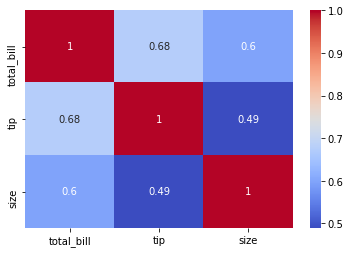

In [65]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [69]:
#convert flights data to matrix form
fp = flights.pivot_table(index='month',columns='year',values='passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


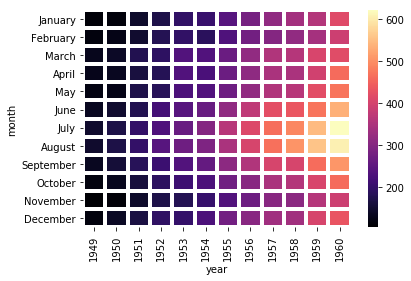

In [75]:
sns.heatmap(fp, cmap='magma',linecolor='white',linewidths=3)

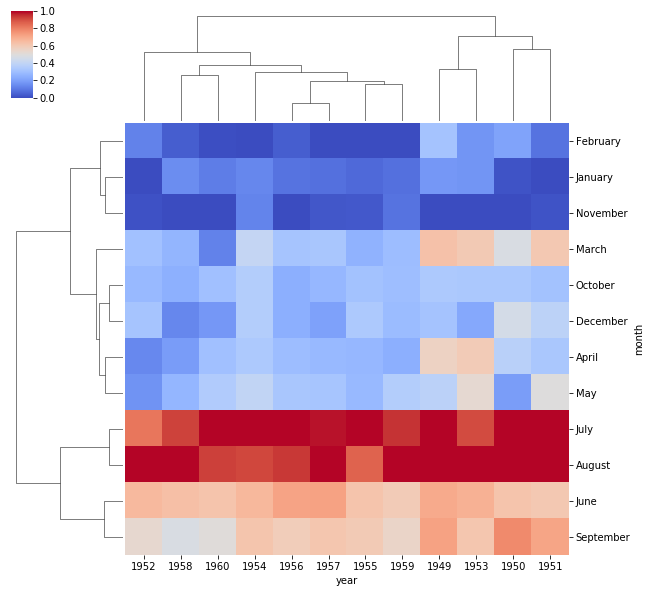

In [79]:
#cluster map uses hierarchical clustering
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

In [81]:


# GRIDS
#facet grid is very useful for enhanced customization of your plots


In [82]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [84]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

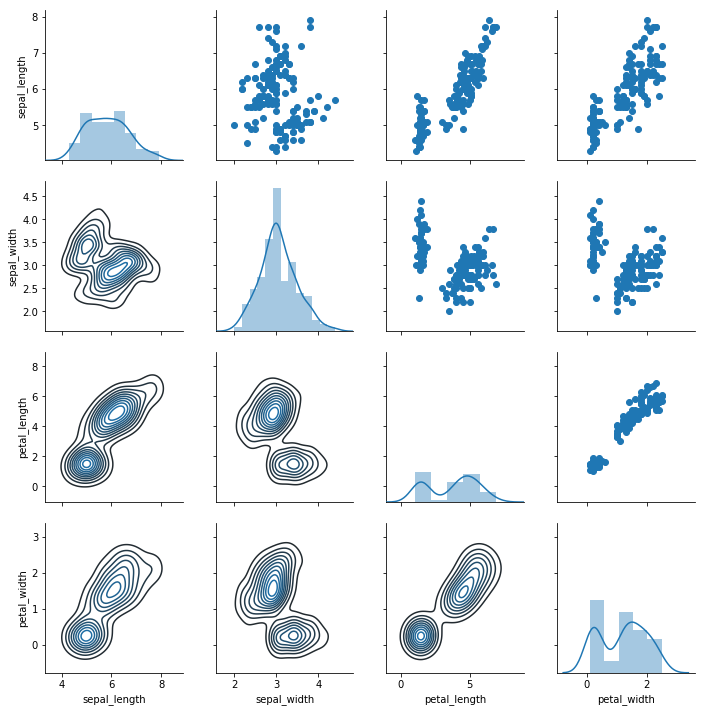

In [88]:
#pairplots
#sns.pairplot(iris)
#pair grid gives you more control
g = sns.PairGrid(iris)
#g.map(plt.scatter)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

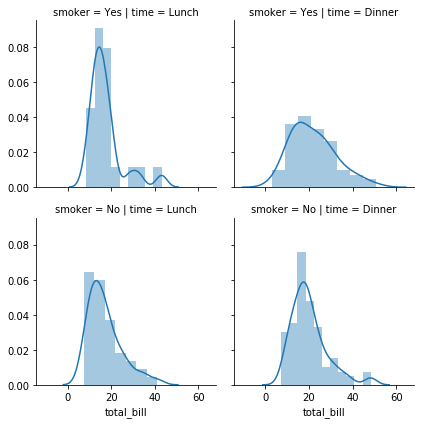

In [91]:
#facet grid
#laod tips dataset
g  = sns.FacetGrid(tips, col='time',row='smoker')
g.map(sns.distplot, 'total_bill')


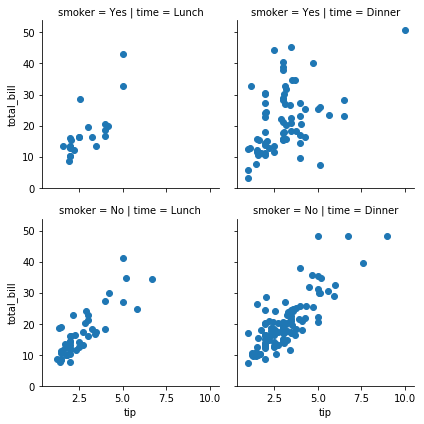

In [92]:
g  = sns.FacetGrid(tips, col='time',row='smoker')
g.map(plt.scatter, 'tip','total_bill')

In [93]:


#regression plots



In [94]:
#lmplots
#change size and aspect ratio of seaborn plots

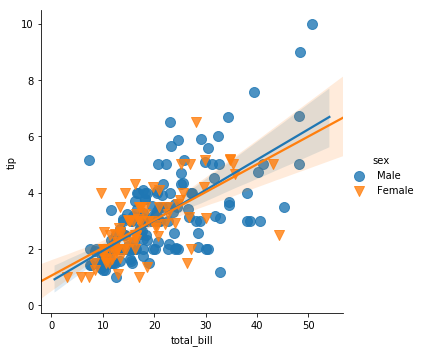

In [8]:
sns.lmplot(x='total_bill', y='tip',data=tips, hue='sex', markers=['o','v'],
          scatter_kws={'s':100})
#matplotlib markers 
#scatter_kws is a way of calling to matplotlib underneath the hood of seaborn

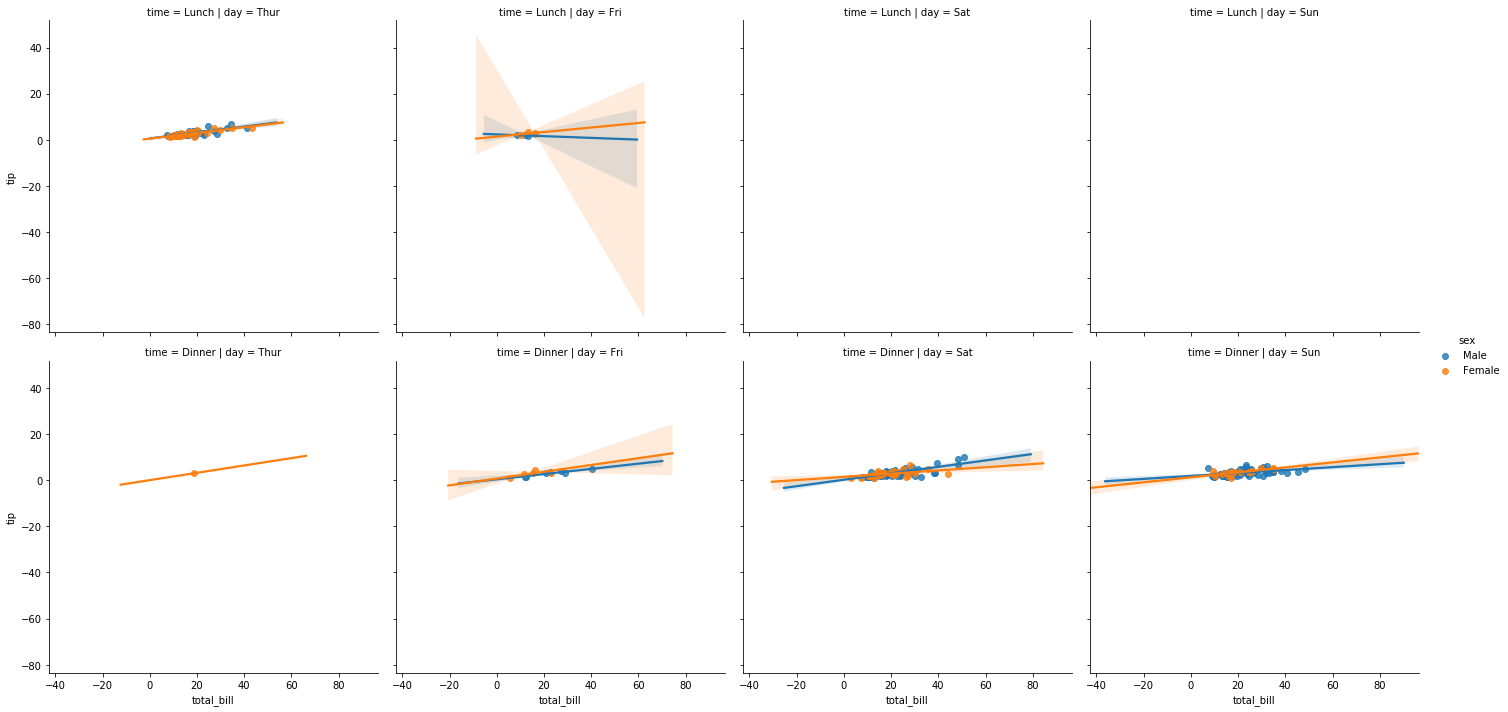

In [11]:
sns.lmplot(x='total_bill', y='tip',data=tips,col='day',row='time', hue='sex')
#you can pass in more arguments to make a grid. Can still use hue within a grid

C:\Users\Jake\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


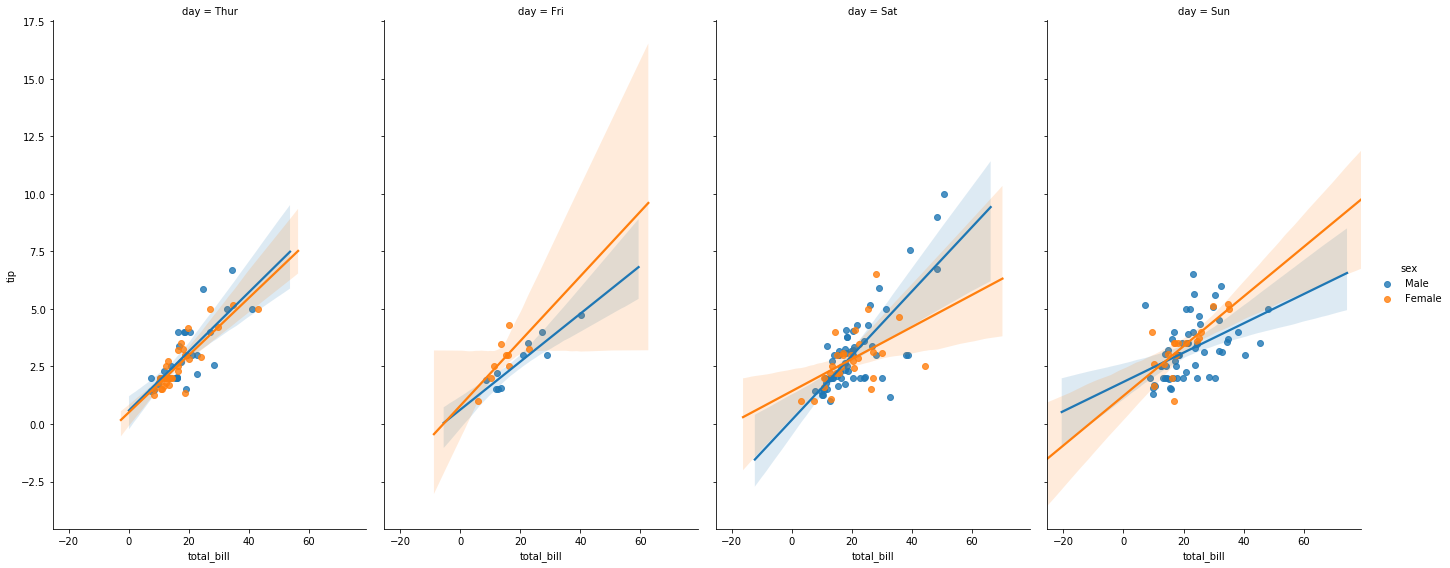

In [13]:
sns.lmplot(x='total_bill', y='tip',data=tips,col='day', hue='sex',
          aspect=0.6, size=8)

In [14]:


#STYLE AND COLOR



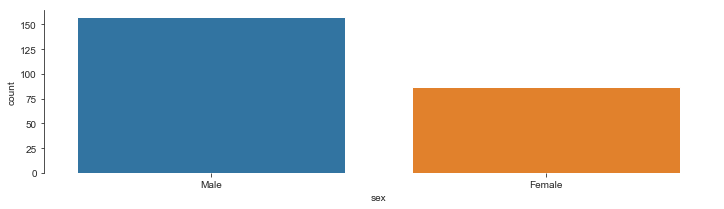

In [27]:
#sns.set_style('darkgrid')
#sns.set_style('whitegrid')
sns.set_style('dark')
sns.set_style('ticks')
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)
sns.despine(bottom=True)


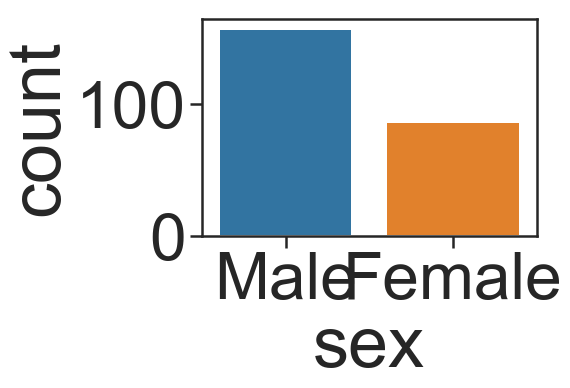

In [34]:
sns.set_context('poster', font_scale=3)   #override defaults for contex and fonts
#sns.set_context('notebook')
sns.countplot(x='sex',data=tips)

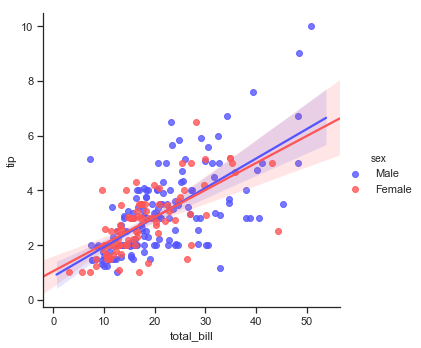

In [37]:
#pallets and colors 
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex',palette='seismic')